In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("high_diamond_ranked_10min.csv")

## 데이터 설명
- 리그 오브 레전드 솔로랭크 다이아 1 ~ 마스터 구간의 데이터
  - gameId : Unique RIOT ID of the game. Can be used with the Riot Games API
  - blueWins : The target column. 1 if the blue team has won, 0 otherwise
  - blue(red)WardsPlaced : Number of warding totems placed by the blue(red) team on the map
  - blue(red)WardDestroyed : Number of warding totems the blue(red) team has destroyed
  - blue(red)FiestBlood : First kill of the game. 1 if the blue(red) team did the first kill, 0 otherwise
  - blue(red)Kills : Number of enemies killed by the blue(red) team
  - blue(red)Deaths : Number of deaths (blue(red) team)
  - blue(red)sAssists : Number of assists (blue(red) team)
  - blue(red)EliteMonsters : Number of elite monsters killed by the blue(red) team (Dragon and Heralds)
  - blue(red)Dragons : Number of dragons killed by the blue(red) team
  - blue(red)Heralds : Number of heralds killed by the blue(red) team
  - blue(red)TowerDestroyed : Number of dragons killed by the blue(red) team
  - blue(red)TotalGold : Blue(red) team total gold
  - blue(red)AvgLevel : Blue(red) team aveage champion level
  - blue(red)TotalExperience : Blue(red) team total experience
  - blue(red)TotalMinions : Blue(red) team totla minions killed (cs)
  - blue(red)TotalJungleMonsters : Blue(red) team total jungle monster killed
  - blue(red)GoldDiff : Blue(red) team gold differnece compared to the enemy team
  - blue(red)ExperienceDiff : Blue(red) team experience difference compared to the enemy team
  - blue(red)CSPerMin : Blue(red) team CS (minions) per minute
  - blue(red)GoldPerMin : Blue(red) team gold per minute

In [3]:
# 분당 골드 획득량과 분당 CS의 경우 단순히 획득 골드에서 10을 나눈 것이라 feature에서 제외하였습니다.
for c in data.columns:
    if "GoldPerMin" in c or "CSPer" in c:
        data.pop(c)

In [4]:
def split_side(data):
    blue = data[[c for c in data.columns if "blue" in c]]
    red = data[["blueWins"] + [c for c in data.columns if "red" in c]]
    return blue, red

In [5]:
train, test = train_test_split(data, train_size=0.3, random_state=14)

In [6]:
train_blue, train_red = split_side(train)

In [7]:
test_blue, test_red = split_side(test)

데이터를 train과 test 비율을 7:3으로 나누었고, 데이터를 각 팀별로 구분하여 분석하기 위해 분리를 진행하였습니다.

## 가설
1. 퍼스트 블러드를 기록한 팀이 초반 오브젝트를 가져갈 확률이 높을 것이다.
2. 초반에 더 많은 골드와 경험치를 획득할수록 이길 확률이 높을 것이다.
3. 초반에 타워를 많이 깼을 수록 이길 확률이 높을 것이다.
4. 초반 시야점수가 높을수록 승률이 높을 것이다.
5. 블루팀의 승률이 높을 것이다.

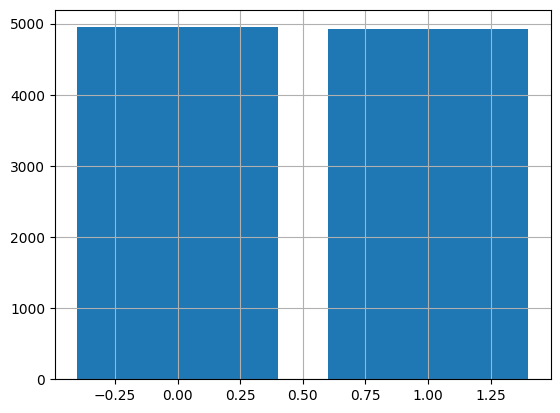

0    4949
1    4930
Name: blueWins, dtype: int64


In [8]:
plt.bar(data.blueWins.value_counts().index, data.blueWins.value_counts().values)
plt.grid()
plt.show()
print(data.blueWins.value_counts())

### 가설 5
위의 그래프와 수치는 현재 보유한 데이터에서 블루팀과 레드팀이 승리한 횟수를 나타낸것입니다. 일반적으로 블루팀의 승률이 레드팀에 비해서 유의미하게 높다는 인식이 있지만 현재 데이터상에서는 유의미한 차이를 보여주지 못하고 있습니다.

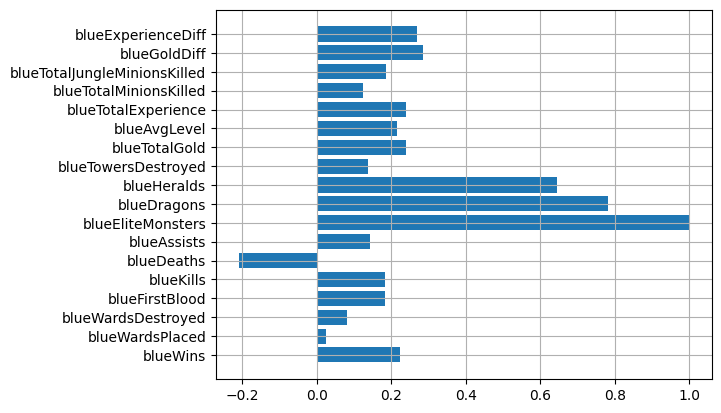

The correlation coefficient between blueEliteMonsters and blueFirstBlood : 0.1820843756244339


In [9]:
b_object = train_blue.corr().blueEliteMonsters
plt.barh(b_object.index, b_object.values)
plt.grid()
plt.show()
print(f"The correlation coefficient between blueEliteMonsters and blueFirstBlood : {b_object.blueFirstBlood}") 

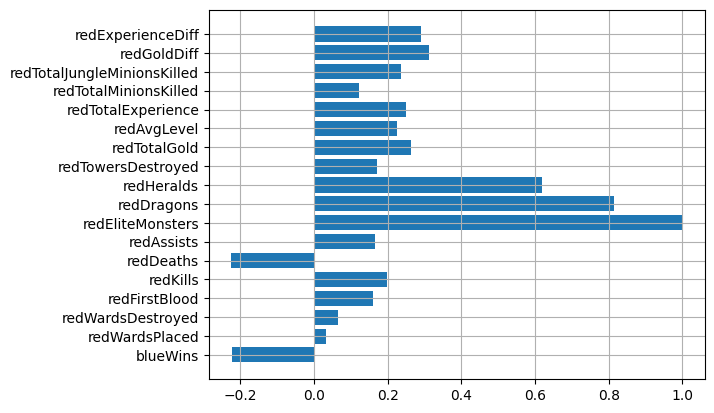

The correlation coefficient between redEliteMonsters and redFirstBlood : 0.1599293928182854


In [10]:
r_object = train_red.corr().redEliteMonsters
plt.barh(r_object.index, r_object.values)
plt.grid()
plt.show()
print(f"The correlation coefficient between redEliteMonsters and redFirstBlood : {r_object.redFirstBlood}") 

### 가설 1
위의 두 그래프는 블루와 레드 진영의 오브젝트 획득률과 다른 지들간의 상과계수를 시각화한 것입니다. 이를 통해 알 수 있는 것은 가설 1에서 예상했던 것과 같이 퍼스트블러드와 양의 상관관계를 갖고 있습니다. 하지만 퍼스트 블러드보다 총 킬수와 골드, 경험치 차이 같은 다른 지표들과 더 높은 상관관계를 보여주고 있습니다. 그러므로 퍼스트 블러드를 기록한 경우 오브젝트를 획득할 학률은 증가하지만 다른 지표들보다 더 유의미한 상관관계를 갖고 있지는 않다고 보여집니다.

### Blue team 

In [11]:
blue_corr = train_blue.corr().blueWins

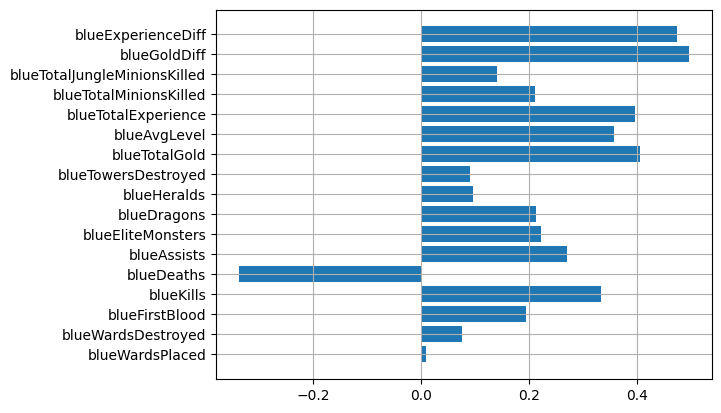

blueWins                        1.000000
blueWardsPlaced                 0.009169
blueWardsDestroyed              0.076237
blueFirstBlood                  0.194770
blueKills                       0.333761
blueDeaths                     -0.339106
blueAssists                     0.269956
blueEliteMonsters               0.222938
blueDragons                     0.213192
blueHeralds                     0.095801
blueTowersDestroyed             0.090595
blueTotalGold                   0.406506
blueAvgLevel                    0.357810
blueTotalExperience             0.396410
blueTotalMinionsKilled          0.211184
blueTotalJungleMinionsKilled    0.140752
blueGoldDiff                    0.497673
blueExperienceDiff              0.474355
Name: blueWins, dtype: float64


In [12]:
plt.barh(blue_corr.index[1:], blue_corr.values[1:])
plt.grid()
plt.show()
print(blue_corr)

### Red team

In [13]:
# 현재 데이터에서 red team의 승리는 blue team의 패배로 기록되어 있어 전체적으로 음의 상관 관계를 보여주는데
# 이를 좀 더 편하게 보기 위해서 전체 값에 -1을 곱해 부호를 바꿔줌
red_corr = (train_red.corr().blueWins) * -1

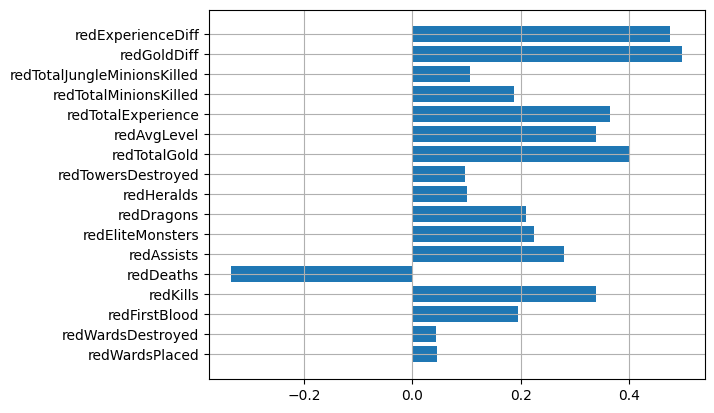

blueWins                      -1.000000
redWardsPlaced                 0.044802
redWardsDestroyed              0.044162
redFirstBlood                  0.194770
redKills                       0.339106
redDeaths                     -0.333761
redAssists                     0.279480
redEliteMonsters               0.223699
redDragons                     0.209170
redHeralds                     0.101572
redTowersDestroyed             0.096127
redTotalGold                   0.401748
redAvgLevel                    0.338953
redTotalExperience             0.365153
redTotalMinionsKilled          0.188081
redTotalJungleMinionsKilled    0.106525
redGoldDiff                    0.497673
redExperienceDiff              0.474355
Name: blueWins, dtype: float64


In [14]:
plt.barh(red_corr.index[1:], red_corr.values[1:])
plt.grid()
plt.show()
print(red_corr)

### Corr diff 

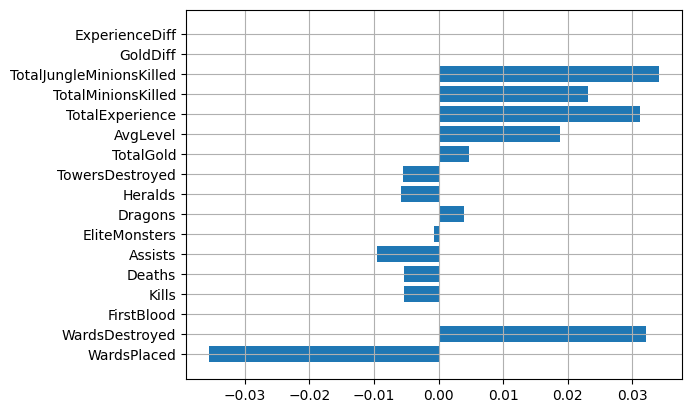

Wins                        2.000000e+00
WardsPlaced                -3.563367e-02
WardsDestroyed              3.207569e-02
FirstBlood                 -1.665335e-16
Kills                      -5.345538e-03
Deaths                     -5.345538e-03
Assists                    -9.523720e-03
EliteMonsters              -7.608873e-04
Dragons                     4.022516e-03
Heralds                    -5.771329e-03
TowersDestroyed            -5.531720e-03
TotalGold                   4.757415e-03
AvgLevel                    1.885665e-02
TotalExperience             3.125668e-02
TotalMinionsKilled          2.310363e-02
TotalJungleMinionsKilled    3.422701e-02
GoldDiff                    0.000000e+00
ExperienceDiff              0.000000e+00
dtype: float64


In [15]:
corr_diff_idx = [i[4:] for i in blue_corr.index]
corr_diff_value = blue_corr.values - red_corr.values
corr_diff = pd.Series(dict(zip(corr_diff_idx, corr_diff_value)))
plt.barh(corr_diff_idx[1:], corr_diff_value[1:])
plt.grid()
plt.show()
print(corr_diff)

위의 그래프는 blueWins와 블루팀, 레드팀의 통계치들을 correlation 분석한 결과물 그리고 양 팀간의 지표별 상관계수의 차이를 각각 시각화한 것이다. 이를 진행한 이유는 각각 통계치별 각 팀의 승리와 얼마만큼의 선형관계를 갖고 있는지를 보기 위해서이다. 상관계수를 살펴보며 알 수 있는 것은 다음과 같습니다.
- 두 팀 모두 지표중 승패와 골드 차이, 경험치 차이가 승패와 가장 높은 상관계수를 보여주고 있습니다.
- 두 팀 모두 사망 수치만이 승패와 음의 상관계수를 보여주고 있습니다.
- 두 팀 모두 시야와 관련된 지표들은 다른 지표들에 비해 상관계수가 유의미하게 낮았습니다.
- 타워철거 역시 두 팀 모두 양의 상관관계를 보여주었지만 다른 지표들에 비해 상관계수가 낮았습니다.
- 블루팀과 레드팀의 가장 큰 차이를 보여주는 지점은 CS와 총 경험치 그리고 시야와 관련된 지표인 와드설치 와드 파괴부분이었습니다.
  - 두 팀 모두 CS와 승리가 양의 상관관계를 보여주고 있었지만 블루팀의 라인 CS와 정글 CS와 승리와의 상관계수가 레드팀 보다 다른 지표들에 비해 유의미하게 높았습니다.
  - 총 경험치도 마찬가지로 블루팀의 총경험치 와 승리와의 상관계수가 레드팀에 비해 약 0.03 더 높았습니다.
  - 시야의 경우에는 와드 설치의 경우 블루팀의 상관계수가 약 0.03 더 높았고 와드 파괴의 경우에는 레드팀의 상관계수가 약 0.03 더 높았습니다.


### 가설 2
위의 그래프와 수치들을 확인한 결과 골드, 경험치는 승리와의 상관계수가 가장 높은 지표들이었습니다. 이를 통해 가설 2로 설정한 초반에 경험치와 골드를 더 많이 획득할 수록 승리할 확률이 높다는 것을 추론할 수 있습니다.

### 가설 3, 4
위의 그래프와 수치들을 확인한 결과 타워를 철거한 횟수, 시야와 승리 사이에는 양의 상관관계가 존재하지만 다른 지표들에 비해 유의미하게 낮은 상관관계를 보여주고 있습니다. 이를 통해 시야점수가 높고 타워를 철거한 횟수가 높을수록 승리할 확률이 높긴하지만 유의미한 수치는 아닌것으로 유추할 수 있습니다.

## 상관계수가 높은 지표들의 승패 분포

### Blue team 

In [16]:
# 상관계수가 0.3 이상인 feature 들만 사용하기 위해서 분리
blue_cols = []
for k, v in blue_corr.items():
    if abs(v) > 0.3:
        if not k == "blueWins":
            blue_cols.append(k)

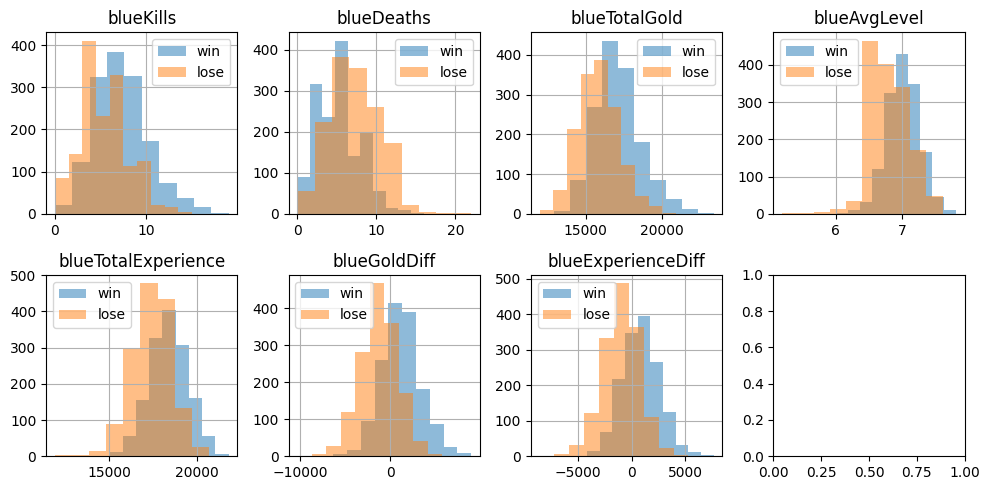

In [17]:
fig, axes = plt.subplots(2,4, figsize=(10,5))
axes = axes.ravel()
for idx, colname in enumerate(blue_cols):
    win = train_blue[colname][train_blue.blueWins == 1]
    lose = train_blue[colname][train_blue.blueWins == 0]
    
    axes[idx].set_title(colname)
    axes[idx].hist(win, label="win", alpha=0.5)
    axes[idx].hist(lose, label="lose", alpha=0.5)
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.show()

위의 그래프를 통해서 상관계수가 0.3 이상인 feature들이 각각 어떤 지점을 기준으로 승패가 확연히 갈리게 되는지를 알 수 있게 되었습니다.
- 킬의 경우에는 약 8 이상의 킬을 기록하게 되면 승률이 매우 높아졌습니다.
- 데스의 경우에도 약 10 이상의 데스를 기록하게 되면 승률이 매우 낮아졌습니다.
- 획득 골드의 경우에는 약 16,000 골드 이상을 획득하게 되면 승률이 매우 높아졌습니다.
- 평균 레벨의 경우에는 약 6.8 이상이 되면 승률이 매우 높아졌습니다.
- 획득 경험치의 경우에는 약 19,000 이상이 되면 승률이 매우 높아졌습니다.
- 골드 차이의 경우에는 약 1,000 이상 앞서게 되면 승률이 매우 높아졌습니다.
- 경험치 차이의 경우에는 약 1,000 이상 앞서게 되면 승률이 매우 높아졌습니다.

### Red team

In [18]:
# 상관계수가 0.3 이상인 feature 들만 사용하기 위해서 분리
red_cols = []
for k, v in red_corr.items():
    if abs(v) > 0.3:
        if not k == "blueWins":
            red_cols.append(k)

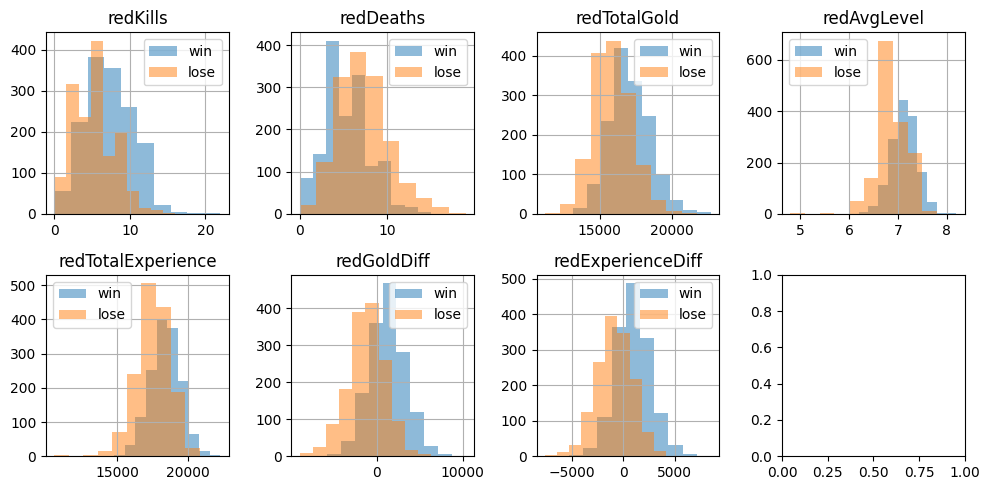

In [19]:
fig, axes = plt.subplots(2,4, figsize=(10,5))
axes = axes.ravel()
for idx, colname in enumerate(red_cols):
    win = train_red[colname][train_red.blueWins == 0]
    lose = train_red[colname][train_red.blueWins == 1]
    
    axes[idx].set_title(colname)
    axes[idx].hist(win, label="win", alpha=0.5)
    axes[idx].hist(lose, label="lose", alpha=0.5)
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.show()

위의 그래프를 통해서 상관계수가 0.3 이상인 feature들이 각각 어떤 지점을 기준으로 승패가 확연히 갈리게 되는지를 알 수 있게 되었습니다.
- 킬의 경우에는 약 10 이상의 킬을 기록하게 되면 승률이 매우 높아졌습니다.
- 데스의 경우에도 약 9 이상의 데스를 기록하게 되면 승률이 매우 낮아졌습니다.
- 획득 골드의 경우에는 약 17,000 골드 이상을 획득하게 되면 승률이 매우 높아졌습니다.
- 평균 레벨의 경우에는 약 7.5 이상이 되면 승률이 매우 높아졌습니다.
- 획득 경험치의 경우에는 약 19,000 이상이 되면 승률이 매우 높아졌습니다.
- 골드 차이의 경우에는 약 1,000 이상 앞서게 되면 승률이 매우 높아졌습니다.
- 경험치 차이의 경우에는 약 1,000 이상 앞서게 되면 승률이 매우 높아졌습니다.